<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/CNN_explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduce CNN

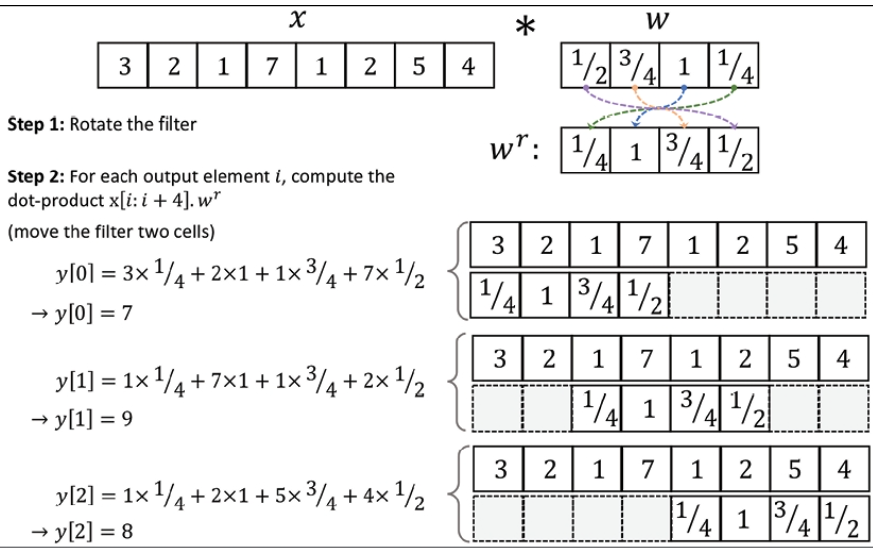

Depending on the choice of p, boundary cells may be treated differently than the cells located in the middle of x.

Now, consider an example where n = 5 and m = 3. Then, with p=0, x[0] is only used in computing one output element (for instance, y[0]), while x[1] is used in the computation of two output elements (for instance, y[0] and y[1]). So, you can see that this different treatment of elements of x can artificially put more emphasis on the middle element, x[2], since it has appeared in most computations.

the size of the output, y, also depends on the choice of the padding strategy we use.

There are three modes of padding that are commonly used in practice: full, same, and valid:

  * In full mode, the padding parameter, p, is set to p = m – 1. Full padding increases the dimensions of the output; thus, it is rarely used in CNN architectures.

  * Same padding is usually used to ensure that the output vector has the same size as the input vector, x. In this case, the padding parameter, p, is computed according to the filter size, along with the requirement that the input size and output size are the same.

  * Finally, computing a convolution in the valid mode refers to the case where p = 0 (no padding).

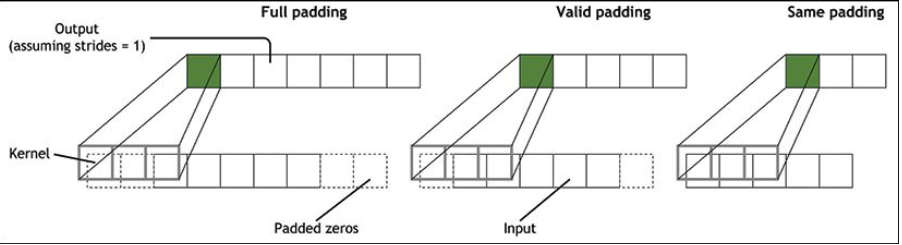

 > In practice, it is recommended that you preserve the spatial size using same padding for the convolutional layers and decrease the spatial size via pooling layers instead
 

# Determining the size of the convolution output
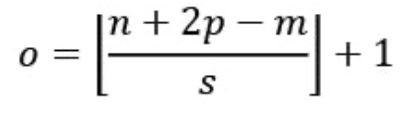

p: padding, s: stride, n: number elements of input, m: n.e of filter(kernel)

o: output size

under bracket is floor

In [ ]:
# 1-D convolutional
import numpy as np
def conv1d(x,w,p,s):
  w_r=np.array(w[::-1])
  x_padded= np.array(x)
  if p >0 :
    zero_pad=np.zeros(shape=p)
    x_padded= np.concatenate([zero_pad,x_padded,zero_pad])
  res=[]
  print(x_padded)
  for i in range(0, int(len(x)/s), s):
    res.append(np.sum(x_padded[i:i+w_r.shape[0]] * w_r))
  return res

x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

conv1d(x=x,w=w, p=2, s=2)

[0. 0. 1. 3. 2. 4. 5. 6. 1. 3. 0. 0.]
[0. 0. 1. 3. 2.]
[1. 3. 2. 4. 5.]


[5.0, 16.0]


2-D convolutional
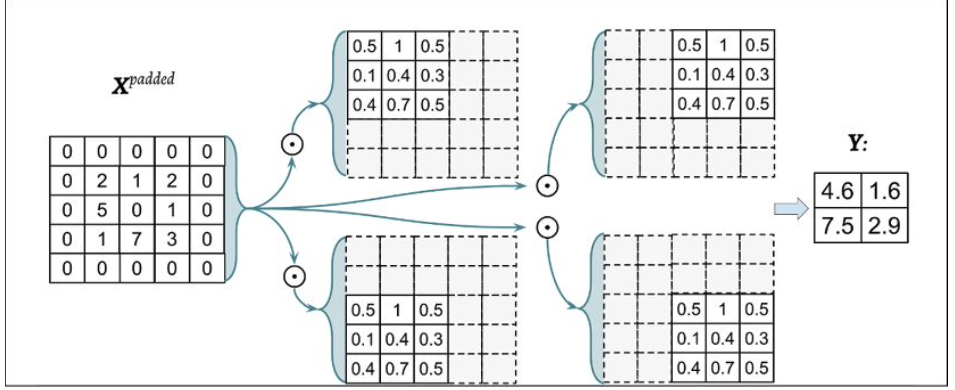

In [ ]:
import numpy as np
def conv2d(X,W,p=(1,1), s=(1,1)):
  X_orign=np.array(X)
  W_rot=np.array(W)[::-1,::-1]
  n1=X_orign.shape[0]+2*p[0]
  n2=X_orign.shape[1]+2*p[1]
  X_padded=np.zeros(shape=(n1,n2))
  X_padded[p[0]:p[0]+X_orign.shape[0], p[1]:p[1]+X_orign.shape[1]]=X_orign
  res=[]
  for i in range(0,int((X_padded.shape[0]-W_rot.shape[0])/s[0])+1,s[0]):
    res.append([])
    for j in range(0,int((X_padded.shape[1]-W_rot.shape[1])/s[1])+1,s[1]):
      X_sub=X_padded[i:i+W_rot.shape[0],j:j+W_rot.shape[1]]
      res[-1].append(np.sum(X_sub*W_rot))
  return np.array(res)
X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

conv2d(X,W,s=(1,1))

array([[11., 25., 32., 13.],
       [19., 25., 24., 13.],
       [13., 28., 25., 17.],
       [11., 17., 14.,  9.]])

# Subsampling layers
is a pooling operations in CNNs: max-pooling and mean-pooling, denote by 
P(n1xn2), Pooling layers don't have paramaters.

Pooling decrease size of features


In [ ]:
import tensorflow as tf
img_raw= tf.io.read_file('example-image.png')
img= tf.image.decode_image(img_raw)
img.shape

TensorShape([252, 221, 3])

In [ ]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imageio
img= imageio.imread('example-image.png')
img.shape

(252, 221, 3)

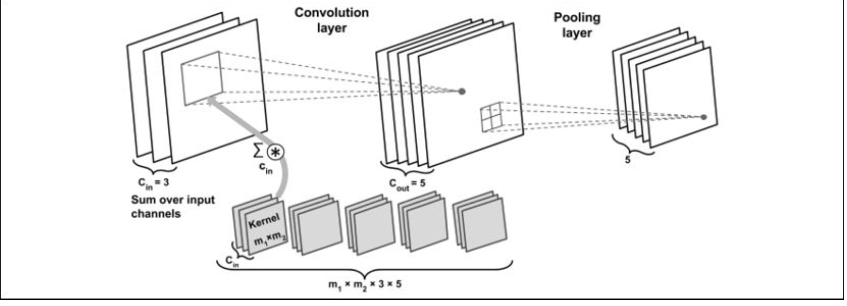

the number of parameter in convolutional is m1xm2x3x5 +5(bias for each kernel)
where as in DNN the parameter is much larger

# Regularizing an NN with dropout

In [ ]:
from tensorflow import keras
conv_layer= keras.layers.Conv2D(
    filters=16,
    kernel_size=(3,3),
    kernel_regularizer= keras.regularizer.l2(0.001)
)
fc_layer= keras.layers.Dense(
    units=16,
    kernel_regularizer= keras.regularizer.l2(0.001)
)


# Implement CNN to solve mnist through tensorflow

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
mnist_build= tfds.builder('mnist')
mnist_build.download_and_prepare()

dataset=mnist_build.as_dataset(shuffle_files=False)
train=dataset['train']
test= dataset['test']

In [ ]:
buffer_size=10000
batch_size=64
epochs=20

mnist_train=train.map(lambda x: (tf.cast(x['image'],tf.float32)/255.0, tf.cast(x['label'],tf.int64)))
mnist_test=test.map(lambda x: (tf.cast(x['image'],tf.float32)/255.0, tf.cast(x['label'],tf.int64)))

tf.random.set_seed(1)

mnist_train=mnist_train.shuffle(buffer_size=10000, reshuffle_each_iteration=False)
mnist_valid=mnist_train.take(1000).batch(batch_size)
mnist_train=mnist_train.skip(1000).batch(batch_size)

ex=next(iter(mnist_train))

In [ ]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', strides=(1,1), data_format='channels_last',name='conv_1', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name='pool_1'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', strides=(1,1), data_format='channels_last',name='conv_2', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name='pool_2'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024, activation='relu', name='fc_1'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=10, activation='softmax', name='fc_2'))

Note that if the strides parameter is not specified in MaxPool2D , by default, it is set equal to the pooling size

In [ ]:
model.build(input_shape=(None,28,28,1))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.compute_output_shape(input_shape=(16,28,28,1))
history= model.fit(mnist_train, epochs=2, validation_data= mnist_valid, shuffle=True)

Epoch 1/2
922/922 [==============================] - 235s 254ms/step - loss: 0.1277 - accuracy: 0.9598 - val_loss: 0.0239 - val_accuracy: 0.9930
Epoch 2/2
922/922 [==============================] - 234s 254ms/step - loss: 0.0425 - accuracy: 0.9863 - val_loss: 0.0200 - val_accuracy: 0.9930


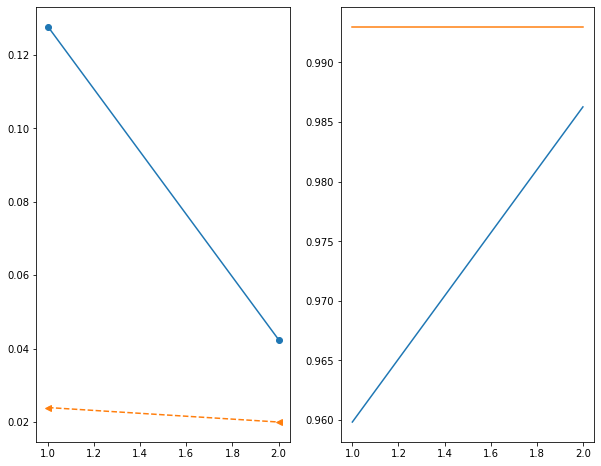

In [ ]:
import matplotlib.pyplot as plt
hist=history.history
import numpy as np
x_arr = np.arange(len(hist['loss'])) + 1
fig= plt.figure(figsize=(10,8))

ax= fig.add_subplot(1,2,1) #  at row1 , at column 2 , index start at 1
ax.plot(x_arr, hist['loss'], '-o')
ax.plot(x_arr, hist['val_loss'], '--<')

ax=fig.add_subplot(1,2,2)
ax.plot(x_arr, hist['accuracy'])
ax.plot(x_arr, hist['val_accuracy'])



In [ ]:
test_result= model.evaluate(mnist_test.batch(20))
test_result[1]

500/500 [==============================] - 11s 21ms/step - loss: 0.0249 - accuracy: 0.9904


0.9904000163078308

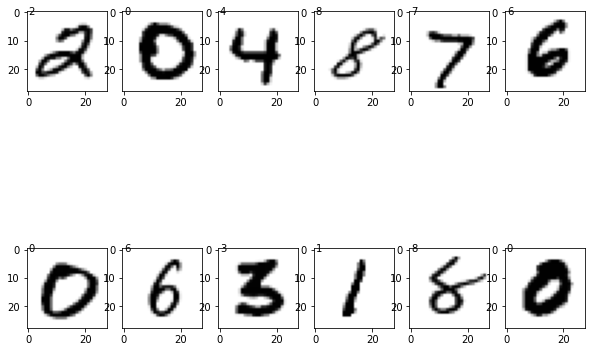

In [ ]:
batch=mnist_test.batch(12)
ex= next(iter(batch))
example= ex[0]
result_ex= model(example)
label_ex= tf.argmax(result_ex,axis=1) # for row, shape=12,1
fig=plt.figure(figsize=(10,8))
for x in range(0,12):
  ax=fig.add_subplot(2,6, x+1)
  ax.imshow(ex[0][x,:,:,0], cmap='gray_r')
  ax.text(0.1,0.9,'{}'.format(label_ex[x]))
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score
y_true=list(mnist_test)[1]
# y_pred= model.predict(list(mnist_test)[0])
# accuracy_score(y_true, y_pred)


#celeba

In [153]:
import tensorflow as tf
import os
import pathlib
file_list=pathlib.Path('file')
file_list=sorted([str(f) for f in file_list.glob('*.jpg')])

In [154]:
import pandas as pd
df=pd.read_csv('list_attr_celeba.csv')
df=dict(df[:100])

In [164]:
def preprocess(path):
  img_raw=tf.io.read_file(path)
  img=tf.image.decode_image(img_raw)
  return img
dataset= tf.data.Dataset.from_tensor_slices({'image':file_list,'attribute':df})
dataset=dataset.map(lambda x: {'image':preprocess(x['image']),'attribute':x['attribute']})
ex=next(iter(dataset))

In [167]:
def process_data_augmentation(example,size=(64,64), mode='train'):
  image=example['image']
  label=example['attribute']['Male']
  if mode =='train':
    img=tf.image.random_crop(image, size=(178,178,3))
    img=tf.image.resize(img, size=size)
    img=tf.image.random_flip_left_right(img)
    return img/255.0, tf.cast(label,tf.int32)  
  else:
    img=tf.image.crop_to_bounding_box(image, offset_height=20, offset_width=0, target_height=178, target_width=178)
    img=tf.image.resize(img, size=size)
    return img/255.0, tf.cast(label,tf.int32)

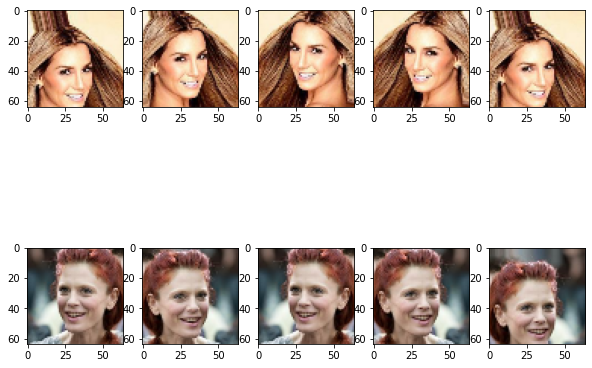

In [168]:
import matplotlib.pyplot as plt
ex_ds= dataset.shuffle(len(dataset), reshuffle_each_iteration=False)
ex_ds= dataset.take(2).repeat(5)
ex_ds=ex_ds.map(lambda x: process_data_augmentation(x,size=(64,64), mode='train'))
fig= plt.figure(figsize=(10,8))
for j,x in enumerate(ex_ds):
  ax=fig.add_subplot(2,5,j//2+(j%2)*5+1)
  ax.imshow(x[0])

In [169]:
import numpy as np
batch_size=10
buffer_size=len(dataset)
image_size=(64,64)
step_per_epochs=np.ceil(len(dataset)/batch_size)
ds_train= dataset.map(lambda x: process_data_augmentation(x,size=(image_size), mode='train'))
ds_train=ds_train.shuffle(buffer_size=buffer_size).repeat()
ds_train=ds_train.batch(batch_size)


ds_valid= dataset.map(lambda x: process_data_augmentation(x,size=(image_size), mode='valid'))
ds_valid=ds_valid.batch(batch_size)


In [178]:
from tensorflow.keras import Sequential
model= Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(units=1, activation=None)
])

model.compute_output_shape(input_shape=(None, 64,64,3))

TensorShape([None, 1])

In [179]:
model.build(input_shape=(None,64,64,3))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 64)       

In [181]:
model.fit(ds_train, validation_data=ds_valid, epochs=20, steps_per_epoch=step_per_epochs)

Epoch 1/20
10/10 [==============================] - 3s 218ms/step - loss: -2.0363 - accuracy: 0.0000e+00 - val_loss: -3.1581 - val_accuracy: 0.0000e+00
Epoch 2/20
10/10 [==============================] - 2s 191ms/step - loss: -26.1243 - accuracy: 0.0000e+00 - val_loss: -30.8539 - val_accuracy: 0.0000e+00
Epoch 3/20
10/10 [==============================] - 2s 192ms/step - loss: -113.9760 - accuracy: 0.0000e+00 - val_loss: -218.1486 - val_accuracy: 0.0000e+00
Epoch 4/20
10/10 [==============================] - 2s 194ms/step - loss: -456.8096 - accuracy: 0.0000e+00 - val_loss: -1043.2550 - val_accuracy: 0.0000e+00
Epoch 5/20
10/10 [==============================] - 2s 190ms/step - loss: -1635.1390 - accuracy: 0.0000e+00 - val_loss: -4137.3667 - val_accuracy: 0.0000e+00
Epoch 6/20
10/10 [==============================] - 2s 192ms/step - loss: -8044.6875 - accuracy: 0.0000e+00 - val_loss: -10136.5312 - val_accuracy: 0.0000e+00
Epoch 7/20
10/10 [==============================] - 2s 192ms/ste